In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../data/yeast.csv")

In [3]:
data

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...,...
1479,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


In [6]:
X = data.drop(["name"], axis=1)
Y = data["name"]

In [8]:
import matplotlib.pyplot as plt

In [12]:
value_counts = Y.value_counts()

In [14]:
value_counts

name
CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: count, dtype: int64

<BarContainer object of 10 artists>

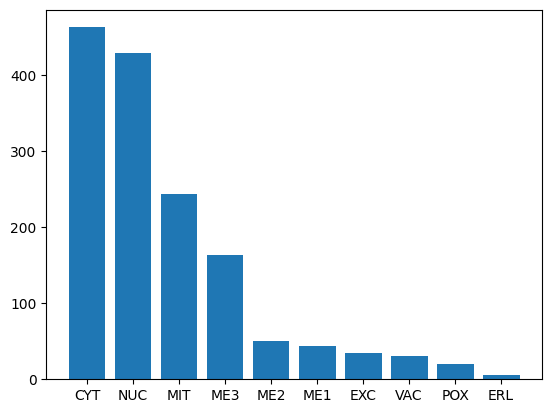

In [17]:
plt.bar(value_counts.keys(), height=value_counts.values)


In [19]:
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.neural_network import MLPClassifier

In [24]:
trainx, testx, trainy, testy = train_test_split(X, Y)

In [22]:
nn = MLPClassifier(hidden_layer_sizes=(64,32,16,8))

In [25]:
nn.fit(trainx, trainy)

MLPClassifier(hidden_layer_sizes=(64, 32, 16, 8))

In [26]:
(nn.predict(trainx) == trainy).mean()

np.float64(0.6037735849056604)

In [27]:
(nn.predict(testx) == testy).mean()

np.float64(0.5606469002695418)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [29]:
svc = SVC()
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

In [30]:
svc.fit(trainx, trainy)
kn.fit(trainx, trainy)
dt.fit(trainx, trainy)

DecisionTreeClassifier()

In [31]:
print((svc.predict(trainx) == trainy).mean())
print((kn.predict(trainx) == trainy).mean())
print((dt.predict(trainx) == trainy).mean())

0.6271338724168913
0.7053009883198562
1.0


In [32]:
print((svc.predict(testx) == testy).mean())
print((kn.predict(testx) == testy).mean())
print((dt.predict(testx) == testy).mean())

0.5822102425876011
0.5714285714285714
0.5040431266846361


| Model          | Train accuracy | Test Accuracy |
|----------------|----------------|---------------|
| SVC            | 62.7%          | 58.2%         |
| Neural Network | 60.4%          | 56.1%         |
| Decision Tree  | 100%           | 50.4%         |
| Knn            | 70.5%          | 57.1%         |

In [33]:
import pickle

In [34]:
pickle.dump(nn, open("../models/yeast_classification_nn.pkl", "wb"))
pickle.dump(svc, open("../models/yeast_classification_svc.pkl", "wb"))
pickle.dump(dt, open("../models/yeast_classification_dt.pkl", "wb"))
pickle.dump(kn, open("../models/yeast_classification_kn.pkl", "wb"))